Loading the data, Visualising it, applying Filters, epoching and labeling


Extracting EDF parameters from c:\Users\Darkrai\Desktop\DP\Amit(5nov)\Kumar_Amit_2025-11-05_16-54-46_Segment_0.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 2897380  =      0.000 ...  2897.380 secs...
Using matplotlib as 2D backend.


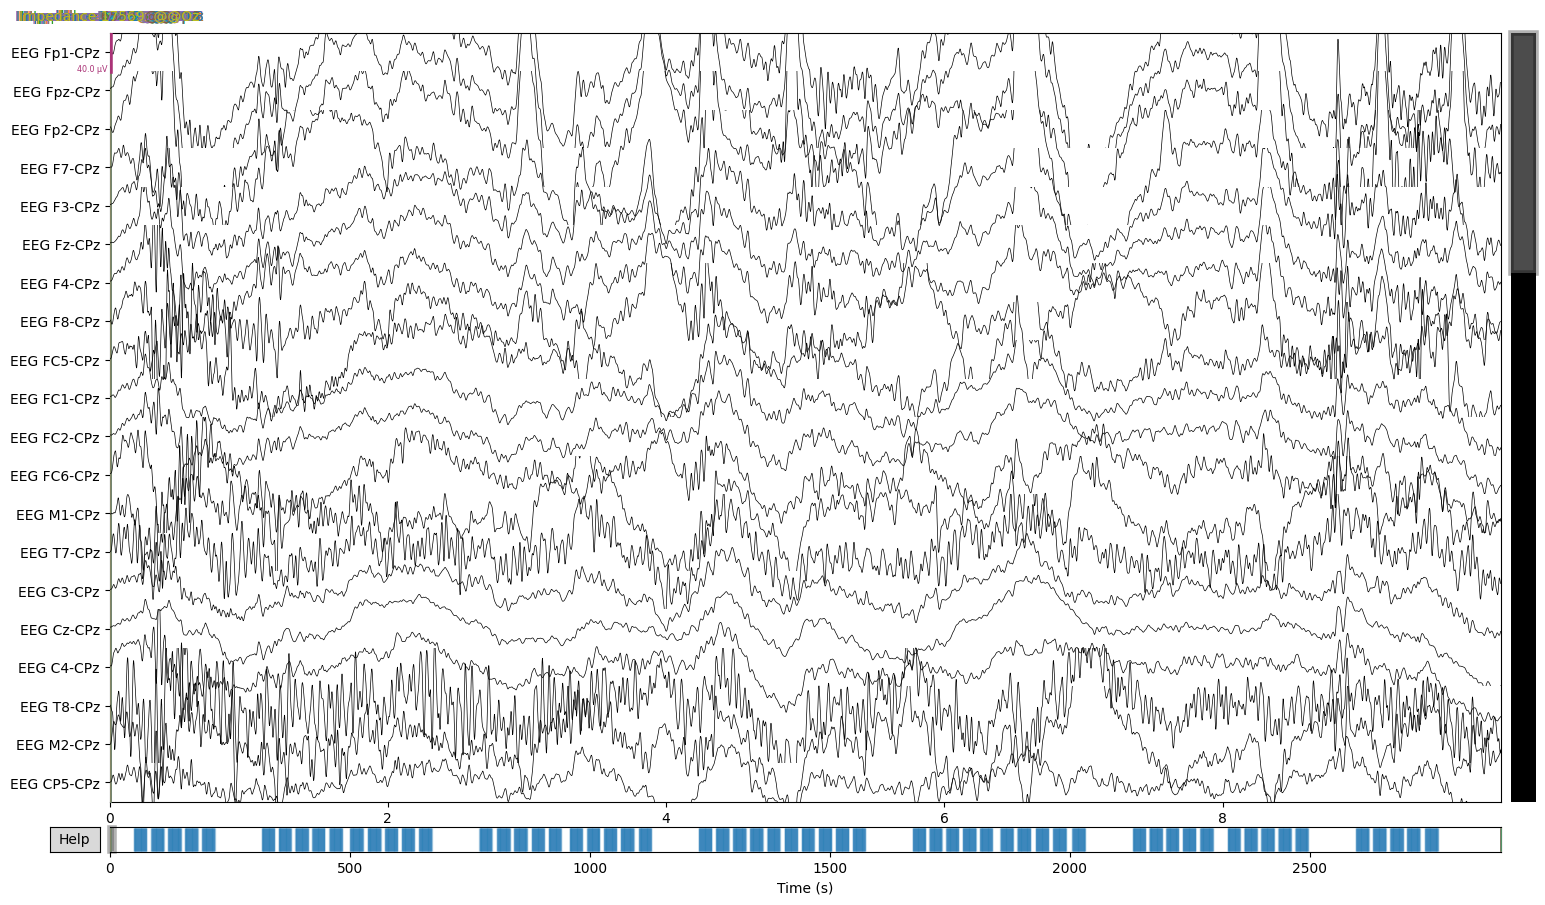

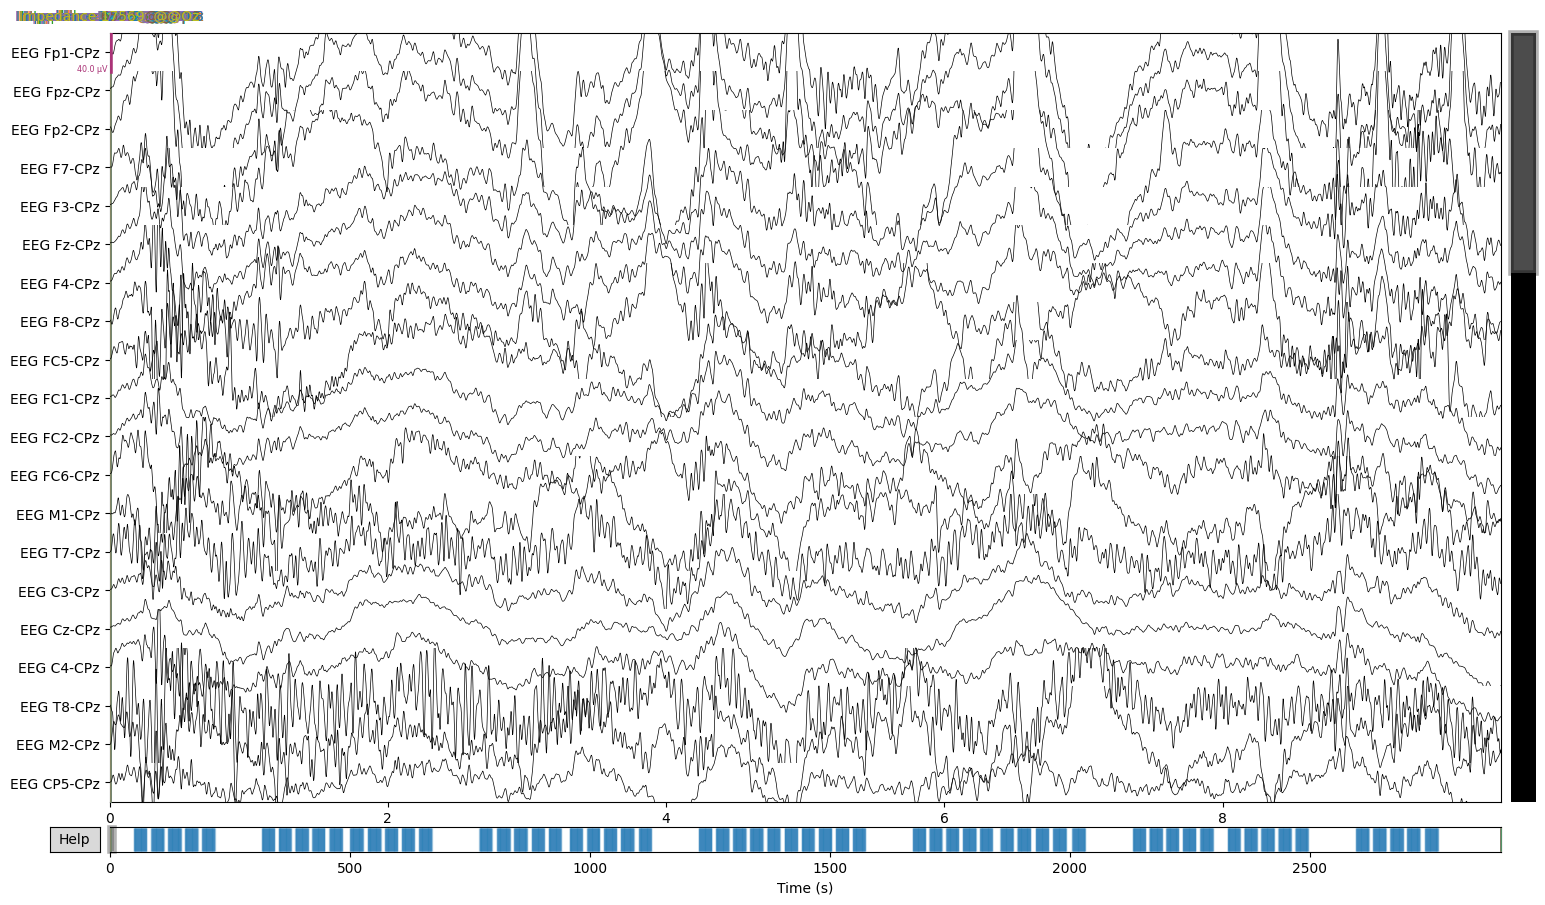

In [1]:
import numpy as np
import pandas as pd
import mne
raw=mne.io.read_raw_edf('Amit(5nov)\Kumar_Amit_2025-11-05_16-54-46_Segment_0.edf',preload=True)
raw.plot()

In [2]:
raw.info

<Info | 8 non-empty values
 bads: []
 ch_names: EEG Fp1-CPz, EEG Fpz-CPz, EEG Fp2-CPz, EEG F7-CPz, EEG F3-CPz, ...
 chs: 64 EEG
 custom_ref_applied: False
 highpass: 0.0 Hz
 lowpass: 500.0 Hz
 meas_date: 2025-11-05 16:54:46 UTC
 nchan: 64
 projs: []
 sfreq: 1000.0 Hz
 subject_info: <subject_info | his_id: X, sex: 0, first_name: Amit, last_name: Kuma, birthday: 2005-05-19>
>

Effective window size : 2.048 (s)
Plotting power spectral density (dB=True).


C:\Users\Darkrai\AppData\Local\Temp\ipykernel_5388\345454383.py:1: RuntimeWarning: Channel locations not available. Disabling spatial colors.
  raw.compute_psd(fmax=50).plot()
c:\Users\Darkrai\Desktop\DP\.venv\Lib\site-packages\mne\viz\utils.py:158: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  (fig or plt).show(**kwargs)


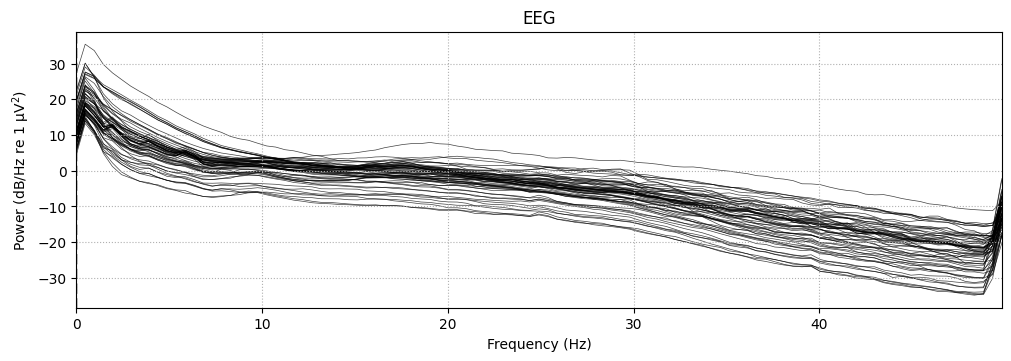

In [4]:
raw.compute_psd(fmax=50).plot()

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.3 - 25 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.30
- Lower transition bandwidth: 0.30 Hz (-6 dB cutoff frequency: 0.15 Hz)
- Upper passband edge: 25.00 Hz
- Upper transition bandwidth: 6.25 Hz (-6 dB cutoff frequency: 28.12 Hz)
- Filter length: 11001 samples (11.001 s)

NOTE: plot_psd() is a legacy function. New code should use .compute_psd().plot().
Effective window size : 2.048 (s)
Plotting power spectral density (dB=True).


C:\Users\Darkrai\AppData\Local\Temp\ipykernel_5388\1363457636.py:2: RuntimeWarning: Channel locations not available. Disabling spatial colors.
  raw.plot_psd(fmax=50)
c:\Users\Darkrai\Desktop\DP\.venv\Lib\site-packages\mne\viz\utils.py:158: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  (fig or plt).show(**kwargs)


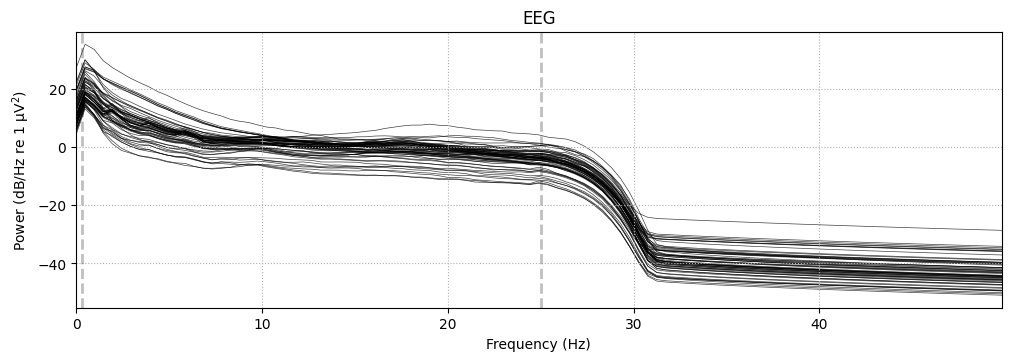

In [ ]:
raw.filter(0.3,20)
raw.plot_psd(fmax=50)

In [6]:
print(raw.annotations)
#print all types of annotations present in the data
print(set(raw.annotations.description))


<Annotations | 3337 segments: 1 (3209), Impedance 10008 @@C6 (1), ...>
{np.str_('Impedance 726  @@PO5'), np.str_('Impedance 17162  @@FC5'), np.str_('Impedance 554  @@F6'), np.str_('Impedance 7810  @@P4'), np.str_('Impedance 186  @@FC2'), np.str_('Impedance 2206  @@P8'), np.str_('Impedance 507  @@C2'), np.str_('Impedance 2722  @@Pz'), np.str_('Impedance 3715  @@C3'), np.str_('Impedance 3303  @@P7'), np.str_('Impedance 3740  @@P1'), np.str_('Impedance 259  @@F1'), np.str_('Impedance 233  @@FC2'), np.str_(' 1'), np.str_('Impedance 1657  @@AF3'), np.str_('Impedance 744  @@T8'), np.str_('Impedance 5574  @@O2'), np.str_('Impedance 899  @@AF4'), np.str_('Impedance 6515  @@FT7'), np.str_('Impedance 1251  @@FC3'), np.str_('Impedance 16637  @@FCz'), np.str_('Impedance 257  @@FT8'), np.str_('Impedance 311  @@TP7'), np.str_('Impedance 10552  @@Cz'), np.str_('Impedance 5564  @@F5'), np.str_('Impedance 6043  @@FT7'), np.str_('Impedance 477  @@F1'), np.str_('Impedance 12314  @@POz'), np.str_('Impedan

In [8]:
 #keep only certain types
keep = [' 1']

# Filter the existing annotations
ann = raw.annotations
mask = [desc in keep for desc in ann.description]

# Create a new Annotations object with the filtered ones
filtered_ann = mne.Annotations(
    onset=ann.onset[mask],
    duration=ann.duration[mask],
    description=ann.description[mask],
    orig_time=ann.orig_time
)

# Attach it back to raw
raw.set_annotations(filtered_ann)

print(raw.annotations)


<Annotations | 3209 segments: 1 (3209)>


In [9]:
ann = raw.annotations
#checking for overlapping annotations
# Compute start and end times
starts = ann.onset
ends = ann.onset + ann.duration

# Sort them in order of onset
order = np.argsort(starts)
starts, ends = starts[order], ends[order]
descs = ann.description[order]

# Check for overlaps
for i in range(len(starts) - 1):
    if ends[i] > starts[i + 1]:
        print(f"⚠️ Overlap between '{descs[i]}' and '{descs[i+1]}' "
              f"from {starts[i+1]:.3f}s to {ends[i]:.3f}s")

In [10]:
print(raw.ch_names)

len(raw.ch_names)

['EEG Fp1-CPz', 'EEG Fpz-CPz', 'EEG Fp2-CPz', 'EEG F7-CPz', 'EEG F3-CPz', 'EEG Fz-CPz', 'EEG F4-CPz', 'EEG F8-CPz', 'EEG FC5-CPz', 'EEG FC1-CPz', 'EEG FC2-CPz', 'EEG FC6-CPz', 'EEG M1-CPz', 'EEG T7-CPz', 'EEG C3-CPz', 'EEG Cz-CPz', 'EEG C4-CPz', 'EEG T8-CPz', 'EEG M2-CPz', 'EEG CP5-CPz', 'EEG CP1-CPz', 'EEG CP2-CPz', 'EEG CP6-CPz', 'EEG P7-CPz', 'EEG P3-CPz', 'EEG Pz-CPz', 'EEG P4-CPz', 'EEG P8-CPz', 'EEG POz-CPz', 'EEG O1-CPz', 'EEG O2-CPz', 'EEG EOG-CPz', 'EEG AF7-CPz', 'EEG AF3-CPz', 'EEG AF4-CPz', 'EEG AF8-CPz', 'EEG F5-CPz', 'EEG F1-CPz', 'EEG F2-CPz', 'EEG F6-CPz', 'EEG FC3-CPz', 'EEG FCz-CPz', 'EEG FC4-CPz', 'EEG C5-CPz', 'EEG C1-CPz', 'EEG C2-CPz', 'EEG C6-CPz', 'EEG CP3-CPz', 'EEG CP4-CPz', 'EEG P5-CPz', 'EEG P1-CPz', 'EEG P2-CPz', 'EEG P6-CPz', 'EEG PO5-CPz', 'EEG PO3-CPz', 'EEG PO4-CPz', 'EEG PO6-CPz', 'EEG FT7-CPz', 'EEG FT8-CPz', 'EEG TP7-CPz', 'EEG TP8-CPz', 'EEG PO7-CPz', 'EEG PO8-CPz', 'EEG Oz-CPz']


64

In [11]:
from mne import events_from_annotations

events, event_id = events_from_annotations(raw)

print(event_id)  # shows mapping of label → event code
print(events[:10])  # (onset sample, 0, event code)


Used Annotations descriptions: [np.str_(' 1')]
{np.str_(' 1'): 1}
[[50455     0     1]
 [50935     0     1]
 [51438     0     1]
 [51935     0     1]
 [52436     0     1]
 [52934     0     1]
 [53435     0     1]
 [53938     0     1]
 [54436     0     1]
 [54936     0     1]]


In [12]:
#epoching
tmin, tmax = -0.1, 0.4  # in seconds relative to each event
baseline = (-0.1, 0)  # means: from start of epoch up to event onset

from mne import Epochs
epochs = Epochs(
    raw,
    events=events,
    event_id=event_id,
    tmin=tmin,
    tmax=tmax,
    baseline=baseline,
    preload=True
)

Not setting metadata
3209 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 3209 events and 501 original time points ...
0 bad epochs dropped


In [ ]:

# Apply baseline correction from -0.1s to 0s
epochs.apply_baseline(baseline=(-0.1, 0))

Applying baseline correction (mode: mean)


<Epochs | 3209 events (all good), -0.1 – 0.4 s (baseline -0.1 – 0 s), ~785.1 MiB, data loaded,
 np.str_(' 1'): 3209>

In [14]:
log=pd.read_csv('Amit(5nov)\Amit Kumar_ex_1_2025-11-04_20h06.43.328.csv')
words=log['Word']
words.dropna(inplace=True)

C:\Users\Darkrai\AppData\Local\Temp\ipykernel_5388\2622246625.py:1: DtypeWarning: Columns (122,154,155,156,157,158,159,160,189,190,191,192,193,194,195,208,209,210,211,212,213,214,217,218,219,220,221,222,223,226,227,228,229,230,231,232,235,236,237,238,239,240,241,244,245,246,247,248,249,250,262,263,264,265,266,267,268,271,272,273,274,275,276,277,280,281,282,283,284,285,286,289,290,291,292,293,294,295) have mixed types. Specify dtype option on import or set low_memory=False.
  log=pd.read_csv('Amit(5nov)\Amit Kumar_ex_1_2025-11-04_20h06.43.328.csv')


In [15]:
len(words)

3209

In [16]:
words=words.to_list()

In [17]:
words_stripped=[]
for i in words:
    words_stripped.append(i[0:-4])

In [18]:
metadata_dict={'epoch_label':words_stripped}

In [19]:
metadata=pd.DataFrame(metadata_dict)

In [20]:
import pandas as pd
import unicodedata

# --- Load the Excel file ---
excel = pd.read_excel("data.xlsx")

# --- Check column names ---
print("Excel columns:", excel.columns.tolist())

# --- Unicode-safe text cleaning function ---
def clean_text(x):
    if pd.isna(x):
        return ""
    x = str(x).strip()  # remove leading/trailing spaces
    x = unicodedata.normalize("NFC", x)  # normalize Unicode (important for Hindi)
    return x

# --- Apply cleaning to both DataFrames ---
metadata["epoch_label_clean"] = metadata["epoch_label"].apply(clean_text)
excel["Word_clean"] = excel["Word"].apply(clean_text)

# --- Merge the two DataFrames on the cleaned columns ---
merged = pd.merge(
    metadata,
    excel,
    how='left',                 # keep all rows from metadata
    left_on='epoch_label_clean',
    right_on='Word_clean'
)

# --- Optional cleanup: drop helper columns if not needed ---
merged = merged.drop(columns=["Word_clean", "epoch_label_clean"])

# --- Inspect result ---
print("\nMerged preview:")
merged



Excel columns: ['Word', 'Frequency_Class', 'mn label(1,0)', 'length_class']

Merged preview:


,epoch_label,Word,Frequency_Class,"mn label(1,0)",length_class
0,प्रतिनिधत्व,प्रतिनिधत्व,0.0,1.0,1.0
1,सफाई,सफाई,1.0,0.0,0.0
2,महाभियोग,महाभियोग,0.0,1.0,1.0
3,63,NaN,NaN,NaN,NaN
4,महिला,महिला,1.0,0.0,1.0
...,...,...,...,...,...
3204,थाना,थाना,1.0,1.0,0.0
3205,33,NaN,NaN,NaN,NaN
3206,स्कूल,स्कूल,1.0,1.0,0.0
3207,अपराधी,अपराधी,1.0,1.0,1.0


In [21]:
epochs.metadata=merged

Adding metadata with 5 columns


In [61]:
NOISE_STD = 0.000009

In [22]:
epochs.save("./amit-epo.fif", overwrite=True)


[WindowsPath('c:/Users/Darkrai/Desktop/DP/amit-epo.fif')]

Extracting parameters from Laxkar\laxkar_tanmay_2025-11-13_18-00-43.vhdr...
Setting channel info structure...
Reading 0 ... 2890649  =      0.000 ...  2890.649 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.3 - 20 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.30
- Lower transition bandwidth: 0.30 Hz (-6 dB cutoff frequency: 0.15 Hz)
- Upper passband edge: 20.00 Hz
- Upper transition bandwidth: 5.00 Hz (-6 dB cutoff frequency: 22.50 Hz)
- Filter length: 11001 samples (11.001 s)



C:\Users\Darkrai\AppData\Local\Temp\ipykernel_5388\2937426447.py:2: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw=mne.io.read_raw_brainvision('Laxkar\laxkar_tanmay_2025-11-13_18-00-43.vhdr',preload=True)


Effective window size : 2.048 (s)
Plotting power spectral density (dB=True).


C:\Users\Darkrai\AppData\Local\Temp\ipykernel_5388\2937426447.py:4: RuntimeWarning: Channel locations not available. Disabling spatial colors.
  raw.compute_psd(fmax=50).plot()
c:\Users\Darkrai\Desktop\DP\.venv\Lib\site-packages\mne\viz\utils.py:158: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  (fig or plt).show(**kwargs)


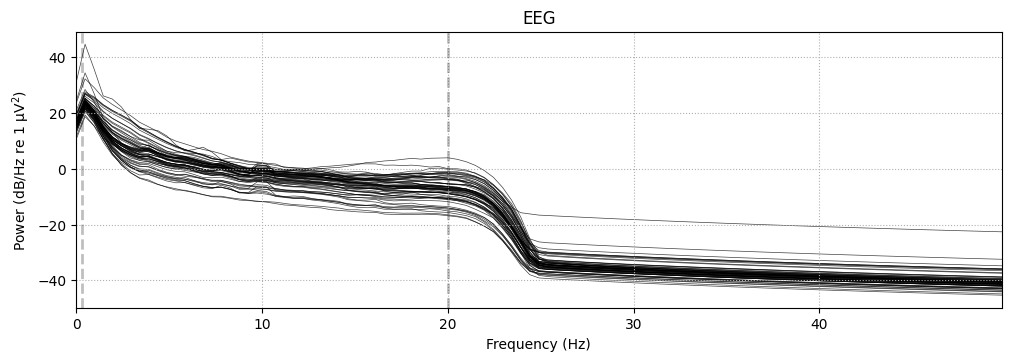

In [24]:
#apply same pre processing to another participant's data
raw=mne.io.read_raw_brainvision('Laxkar\laxkar_tanmay_2025-11-13_18-00-43.vhdr',preload=True)
raw.filter(0.3,20)
raw.compute_psd(fmax=50).plot()

In [25]:
print(raw.annotations)
#print all types of annotations present in the data
print(set(raw.annotations.description))



<Annotations | 3225 segments: Marker/Impedance (4), New Segment/ (1), ...>
{np.str_('Marker/Impedance'), np.str_('Stimulus/s1'), np.str_('New Segment/')}


In [26]:
 #keep only certain types
keep = ['Stimulus/s1']

# Filter the existing annotations
ann = raw.annotations
mask = [desc in keep for desc in ann.description]

# Create a new Annotations object with the filtered ones
filtered_ann = mne.Annotations(
    onset=ann.onset[mask],
    duration=ann.duration[mask],
    description=ann.description[mask],
    orig_time=ann.orig_time
)

# Attach it back to raw
raw.set_annotations(filtered_ann)

print(raw.annotations)


<Annotations | 3220 segments: Stimulus/s1 (3220)>


In [27]:
from mne import events_from_annotations

events, event_id = events_from_annotations(raw)

print(event_id)  # shows mapping of label → event code
print(events[:10])  # (onset sample, 0, event code)


Used Annotations descriptions: [np.str_('Stimulus/s1')]
{np.str_('Stimulus/s1'): 10001}
[[61713     0 10001]
 [62199     0 10001]
 [62698     0 10001]
 [63200     0 10001]
 [63696     0 10001]
 [64194     0 10001]
 [64696     0 10001]
 [65197     0 10001]
 [65696     0 10001]
 [66198     0 10001]]


In [28]:
#epoching
tmin, tmax = -0.1, 0.4  # in seconds relative to each event
baseline = (-0.1, 0)  # means: from start of epoch up to event onset

from mne import Epochs
epochs = Epochs(
    raw,
    events=events,
    event_id=event_id,
    tmin=tmin,
    tmax=tmax,
    baseline=baseline,
    preload=True
)

# Apply baseline correction from -0.1s to 0s
epochs.apply_baseline(baseline=(-0.1, 0))

Not setting metadata
3220 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 3220 events and 501 original time points ...
0 bad epochs dropped
Applying baseline correction (mode: mean)


<Epochs | 3220 events (all good), -0.1 – 0.4 s (baseline -0.1 – 0 s), ~787.8 MiB, data loaded,
 np.str_('Stimulus/s1'): 3220>

In [29]:
log=pd.read_csv('Laxkar\Tanmay Laxkar_ex_1_2025-11-13_04h32.32.358.csv')
words=log['Word']
words.dropna(inplace=True)

C:\Users\Darkrai\AppData\Local\Temp\ipykernel_5388\742713532.py:1: DtypeWarning: Columns (122,154,155,156,157,158,159,160,189,190,191,192,193,194,195,208,209,210,211,212,213,214,217,218,219,220,221,222,223,226,227,228,229,230,231,232,235,236,237,238,239,240,241,244,245,246,247,248,249,250,262,263,264,265,266,267,268,271,272,273,274,275,276,277,280,281,282,283,284,285,286,289,290,291,292,293,294,295) have mixed types. Specify dtype option on import or set low_memory=False.
  log=pd.read_csv('Laxkar\Tanmay Laxkar_ex_1_2025-11-13_04h32.32.358.csv')


In [30]:
len(words)

3220

In [31]:
words=words.to_list()
words_stripped=[]
for i in words:
    words_stripped.append(i[0:-4])
metadata_dict={'epoch_label':words_stripped}
metadata=pd.DataFrame(metadata_dict)
import pandas as pd
import unicodedata

# --- Load the Excel file ---
excel = pd.read_excel("data.xlsx")

# --- Check column names ---
print("Excel columns:", excel.columns.tolist())

# --- Unicode-safe text cleaning function ---
def clean_text(x):
    if pd.isna(x):
        return ""
    x = str(x).strip()  # remove leading/trailing spaces
    x = unicodedata.normalize("NFC", x)  # normalize Unicode (important for Hindi)
    return x

# --- Apply cleaning to both DataFrames ---
metadata["epoch_label_clean"] = metadata["epoch_label"].apply(clean_text)
excel["Word_clean"] = excel["Word"].apply(clean_text)

# --- Merge the two DataFrames on the cleaned columns ---
merged = pd.merge(
    metadata,
    excel,
    how='left',                 # keep all rows from metadata
    left_on='epoch_label_clean',
    right_on='Word_clean'
)

# --- Optional cleanup: drop helper columns if not needed ---
merged = merged.drop(columns=["Word_clean", "epoch_label_clean"])

# --- Inspect result ---
print("\nMerged preview:")
merged



Excel columns: ['Word', 'Frequency_Class', 'mn label(1,0)', 'length_class']

Merged preview:


,epoch_label,Word,Frequency_Class,"mn label(1,0)",length_class
0,कुंज,कुंज,0.0,0.0,0.0
1,भूगर्भीय,भूगर्भीय,0.0,0.0,1.0
2,अपराधी,अपराधी,1.0,1.0,1.0
3,मोबाइल,मोबाइल,1.0,1.0,1.0
4,प्रियजन,प्रियजन,0.0,1.0,1.0
...,...,...,...,...,...
3215,मिट्टी,मिट्टी,1.0,0.0,0.0
3216,67,NaN,NaN,NaN,NaN
3217,अस्पताल,अस्पताल,1.0,1.0,1.0
3218,गरुड़,गरुड़,0.0,0.0,1.0


In [32]:
epochs.metadata=merged

Adding metadata with 5 columns


In [33]:
epochs.save("./laxkar-epo.fif", overwrite=True)


[WindowsPath('c:/Users/Darkrai/Desktop/DP/laxkar-epo.fif')]

AVERAGING THE TWO DATA's AND SAVING IT

In [36]:
import mne
import numpy as np
import pandas as pd

# -----------------------------------------------------
# LOAD
# -----------------------------------------------------
epochs_A = mne.read_epochs("Laxkar-epo.fif", preload=True)
epochs_B = mne.read_epochs("amit-epo.fif", preload=True)

meta_A = epochs_A.metadata.copy()
meta_B = epochs_B.metadata.copy()

# -----------------------------------------------------
# CHECK METADATA CONSISTENCY
# -----------------------------------------------------
cols_A = list(meta_A.columns)
cols_B = list(meta_B.columns)

if cols_A != cols_B:
    raise ValueError("❌ Metadata mismatch between files!")

required = ["Word", "Frequency_Class"]
for c in required:
    if c not in cols_A:
        raise ValueError(f"❌ Missing '{c}' column in metadata!")

print("✓ Metadata columns match:", cols_A)

# -----------------------------------------------------
# DROP TRIALS WHERE Frequency_Class IS NaN
# -----------------------------------------------------
valid_A = meta_A["Frequency_Class"].notna().values
valid_B = meta_B["Frequency_Class"].notna().values

epochs_A = epochs_A[valid_A]
epochs_B = epochs_B[valid_B]

meta_A = epochs_A.metadata
meta_B = epochs_B.metadata

print(f"✓ After NaN removal: {len(meta_A)} trials in A, {len(meta_B)} trials in B")

# Pull out all data once (FAST)
data_A = epochs_A.get_data()   # shape: (nA, ch, t)
data_B = epochs_B.get_data()   # shape: (nB, ch, t)

# -----------------------------------------------------
# FIND COMMON WORDS AND MATCH COUNTS
# -----------------------------------------------------
words = sorted(set(meta_A["Word"]) & set(meta_B["Word"]))
print("✓ Common words:", words)

combined_data_list = []
combined_meta_list = []

# Vectorized grouping: precomputed indices for all words
word_to_idx_A = {w: np.where(meta_A["Word"].values == w)[0] for w in words}
word_to_idx_B = {w: np.where(meta_B["Word"].values == w)[0] for w in words}

for w in words:
    idxA = word_to_idx_A[w]
    idxB = word_to_idx_B[w]

    n = min(len(idxA), len(idxB))
    if n == 0:
        continue

    print(f"Word '{w}': Using {n} trials")

    # -----------------------------------------------------
    # VECTORIZED AVERAGING (no loops)
    # -----------------------------------------------------
    dA = data_A[idxA[:n]]  # shape (n, ch, t)
    dB = data_B[idxB[:n]]
    avg = (dA + dB) / 2.0

    combined_data_list.append(avg)
    combined_meta_list.append(meta_A.iloc[idxA[:n]])

# -----------------------------------------------------
# STACK INTO SINGLE ARRAYS
# -----------------------------------------------------
combined_data = np.vstack(combined_data_list)
combined_meta = pd.concat(combined_meta_list).reset_index(drop=True)

print("✓ Final combined trials:", combined_data.shape[0])

# -----------------------------------------------------
# CREATE NEW EPOCHS
# -----------------------------------------------------
info = epochs_A.info.copy()
tmin = epochs_A.tmin

events = np.column_stack([
    np.arange(len(combined_data)),
    np.zeros(len(combined_data), int),
    np.zeros(len(combined_data), int)
])

epochs_combined = mne.EpochsArray(
    combined_data,
    info=info,
    events=events,
    metadata=combined_meta,
    tmin=tmin
)

# -----------------------------------------------------
# SAVE
# -----------------------------------------------------
epochs_combined.save("Averaged_Laxkar_Amit.fif", overwrite=True)

print("\n✓ Successfully created optimized averaged epochs!")
print("Output file: Averaged_Laxkar_Amit.fif")


Reading c:\Users\Darkrai\Desktop\DP\Laxkar-epo.fif ...
Isotrak not found
    Found the data of interest:
        t =    -100.00 ...     400.00 ms
        0 CTF compensation matrices available
Adding metadata with 5 columns
3220 matching events found
No baseline correction applied
0 projection items activated
Reading c:\Users\Darkrai\Desktop\DP\amit-epo.fif ...
Isotrak not found
    Found the data of interest:
        t =    -100.00 ...     400.00 ms
        0 CTF compensation matrices available
Adding metadata with 5 columns
3209 matching events found
No baseline correction applied
0 projection items activated
✓ Metadata columns match: ['epoch_label', 'Word', 'Frequency_Class', 'mn label(1,0)', 'length_class']
✓ After NaN removal: 3000 trials in A, 3000 trials in B
✓ Common words: ['अंतर्मुखी ', 'अंधड़ ', 'अपराधी ', 'अस्पताल ', 'आगे ', 'आतिशबाजियों ', 'आर्कषक ', 'आश्रम ', 'इठलाती', 'कन्याएं ', 'कबुतरी', 'कम्बल ', 'कसक ', 'कार्यक्रम ', 'कार्यालय ', 'कुंज ', 'कृमि ', 'केशों ', 'कौंध ', 'ग

C:\Users\Darkrai\AppData\Local\Temp\ipykernel_5388\2238210030.py:112: RuntimeWarning: This filename (Averaged_Laxkar_Amit.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs_combined.save("Averaged_Laxkar_Amit.fif", overwrite=True)



✓ Successfully created optimized averaged epochs!
Output file: Averaged_Laxkar_Amit.fif


In [38]:
epochs=mne.read_epochs('Averaged_Laxkar_Amit.fif',preload=True)

Reading c:\Users\Darkrai\Desktop\DP\Averaged_Laxkar_Amit.fif ...


C:\Users\Darkrai\AppData\Local\Temp\ipykernel_5388\2471307473.py:1: RuntimeWarning: This filename (Averaged_Laxkar_Amit.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs=mne.read_epochs('Averaged_Laxkar_Amit.fif',preload=True)


Isotrak not found
    Found the data of interest:
        t =    -100.00 ...     400.00 ms
        0 CTF compensation matrices available
Adding metadata with 5 columns
3000 matching events found
No baseline correction applied
0 projection items activated


C:\Users\Darkrai\AppData\Local\Temp\ipykernel_5388\3329533221.py:2: RuntimeWarning: Channel locations not available. Disabling spatial colors.
  evoked_all.plot(


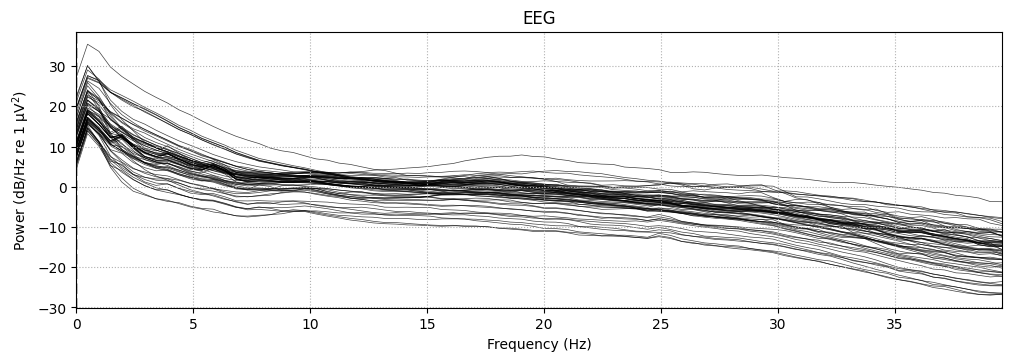

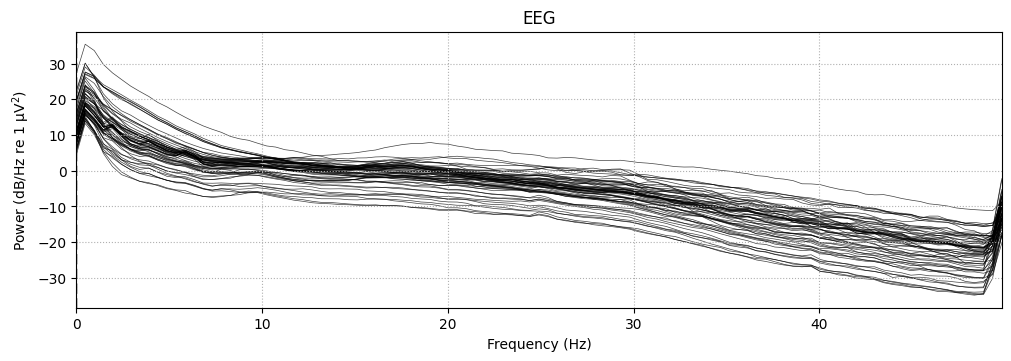

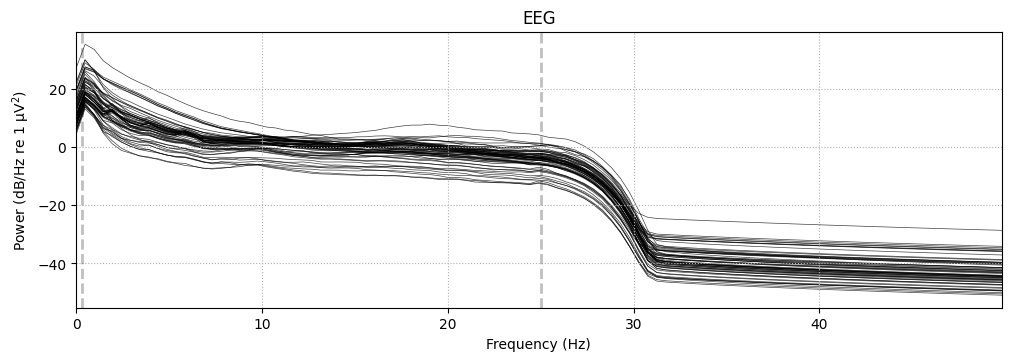

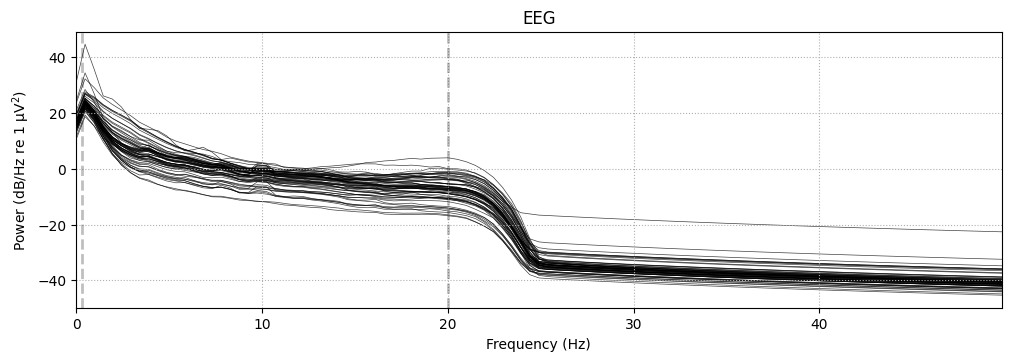

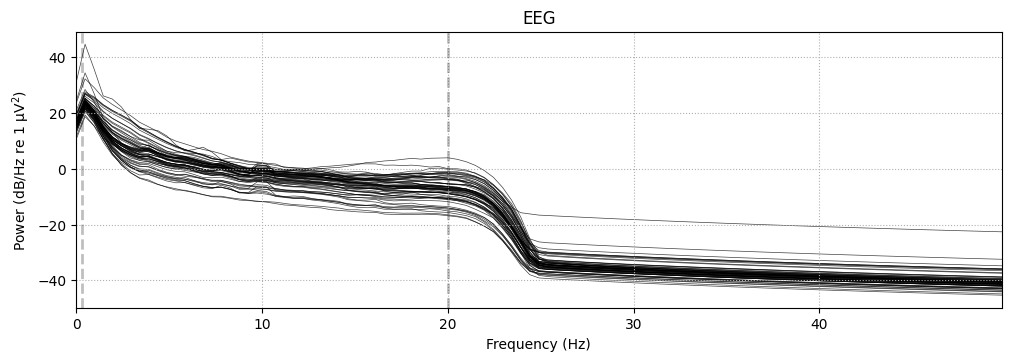

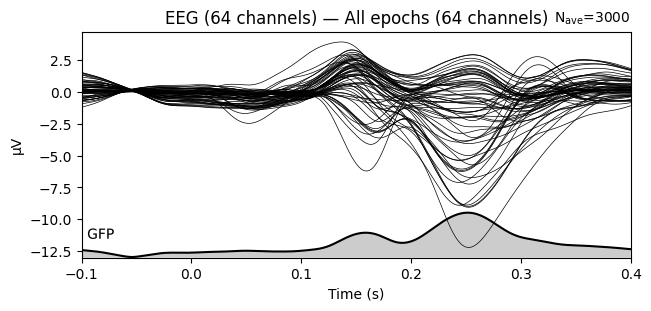

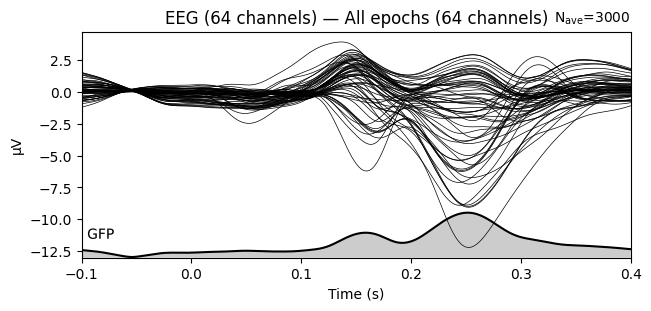

In [39]:
evoked_all = epochs.average()
evoked_all.plot(
    spatial_colors=True,
    gfp=True,
    titles="EEG (64 channels) — All epochs",
    time_unit='s'
)


Reading c:\Users\Darkrai\Desktop\DP\Averaged_Laxkar_Amit.fif ...
Isotrak not found
    Found the data of interest:
        t =    -100.00 ...     400.00 ms
        0 CTF compensation matrices available


C:\Users\Darkrai\AppData\Local\Temp\ipykernel_5388\170005154.py:8: RuntimeWarning: This filename (Averaged_Laxkar_Amit.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs("Averaged_Laxkar_Amit.fif", preload=True)


Adding metadata with 5 columns
3000 matching events found
No baseline correction applied
0 projection items activated


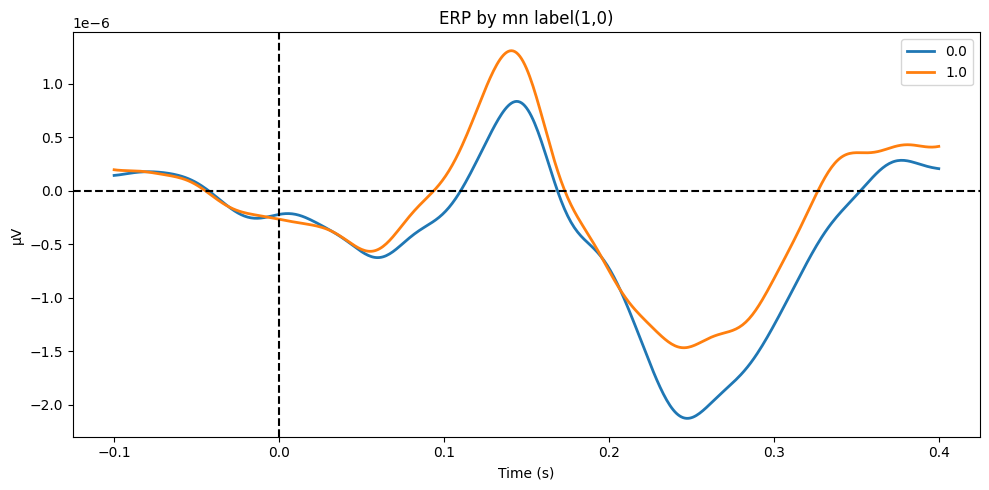

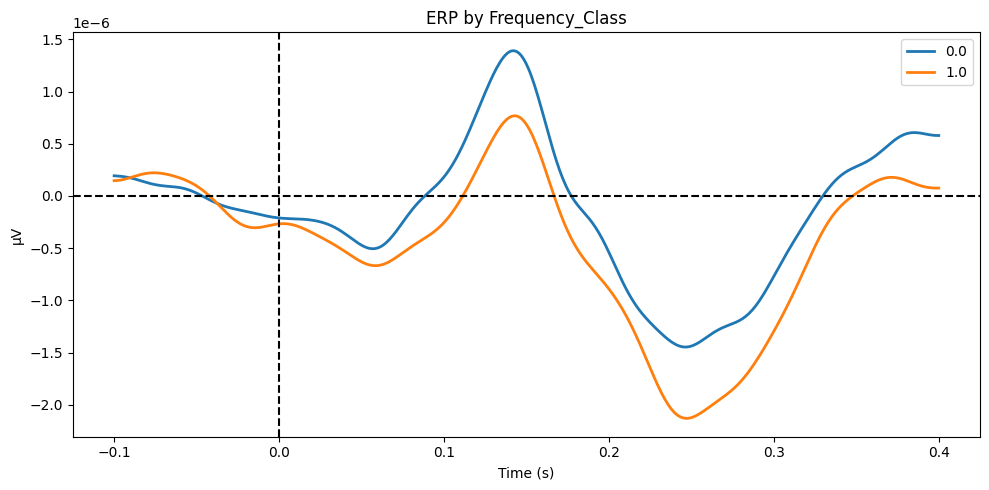

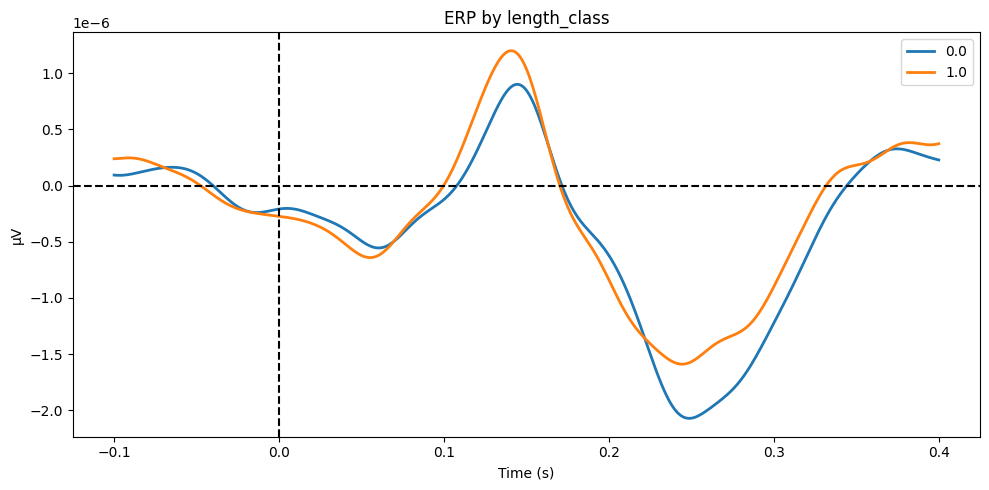

In [45]:
import mne
import numpy as np
import matplotlib.pyplot as plt

# -----------------------------------------------------
# LOAD EPOCHS
# -----------------------------------------------------
epochs = mne.read_epochs("Averaged_Laxkar_Amit.fif", preload=True)
meta = epochs.metadata
data = epochs.get_data()     # (n_trials, n_channels, n_times)
times = epochs.times

# -----------------------------------------------------
# FUNCTION: PLOT ERP FOR A METADATA COLUMN
# -----------------------------------------------------
def plot_erp_by_column(column_name, picks=None):
    """
    plots ERP line plot for each unique class in metadata[column_name]
    """
    classes = sorted(meta[column_name].unique())

    plt.figure(figsize=(10, 5))

    for c in classes:
        # trial indices for this class
        idx = np.where(meta[column_name] == c)[0]

        # average across trials
        erp = data[idx].mean(axis=0)     # (channels, time)

        # If user wants a single channel, pick it
        if picks is not None:
            erp = erp[picks]            # (time,)
        else:
            # average across all channels
            erp = erp.mean(axis=0)

        plt.plot(times, erp, label=str(c), linewidth=2)

    plt.axvline(0, color='k', linestyle='--')
    plt.axhline(0, color='k', linestyle='--')
    plt.xlabel("Time (s)")
    plt.ylabel("µV")
    plt.title(f"ERP by {column_name}")
    plt.legend()
    plt.tight_layout()
    plt.show()


# -----------------------------------------------------
# EXAMPLE CALLS:
# -----------------------------------------------------

# ERP for mn label classes
plot_erp_by_column("mn label(1,0)")

# ERP for frequency classes
plot_erp_by_column("Frequency_Class")

# ERP for length classes
plot_erp_by_column("length_class")


Reading c:\Users\Darkrai\Desktop\DP\Averaged_Laxkar_Amit.fif ...
Isotrak not found


C:\Users\Darkrai\AppData\Local\Temp\ipykernel_5388\1243245194.py:10: RuntimeWarning: This filename (Averaged_Laxkar_Amit.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs("Averaged_Laxkar_Amit.fif", preload=True)


    Found the data of interest:
        t =    -100.00 ...     400.00 ms
        0 CTF compensation matrices available
Adding metadata with 5 columns
3000 matching events found
No baseline correction applied
0 projection items activated


c:\Users\Darkrai\Desktop\DP\.venv\Lib\site-packages\seaborn\utils.py:61: UserWarning: Glyph 2309 (\N{DEVANAGARI LETTER A}) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
c:\Users\Darkrai\Desktop\DP\.venv\Lib\site-packages\seaborn\utils.py:61: UserWarning: Matplotlib currently does not support Devanagari natively.
  fig.canvas.draw()
c:\Users\Darkrai\Desktop\DP\.venv\Lib\site-packages\seaborn\utils.py:61: UserWarning: Glyph 2306 (\N{DEVANAGARI SIGN ANUSVARA}) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
c:\Users\Darkrai\Desktop\DP\.venv\Lib\site-packages\seaborn\utils.py:61: UserWarning: Glyph 2340 (\N{DEVANAGARI LETTER TA}) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
c:\Users\Darkrai\Desktop\DP\.venv\Lib\site-packages\seaborn\utils.py:61: UserWarning: Glyph 2352 (\N{DEVANAGARI LETTER RA}) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
c:\Users\Darkrai\Desktop\DP\.venv\Lib\site-packages\seaborn\utils.py:61: UserWarning: Glyph 2381 (\N{DEVANAGARI SIGN VIR

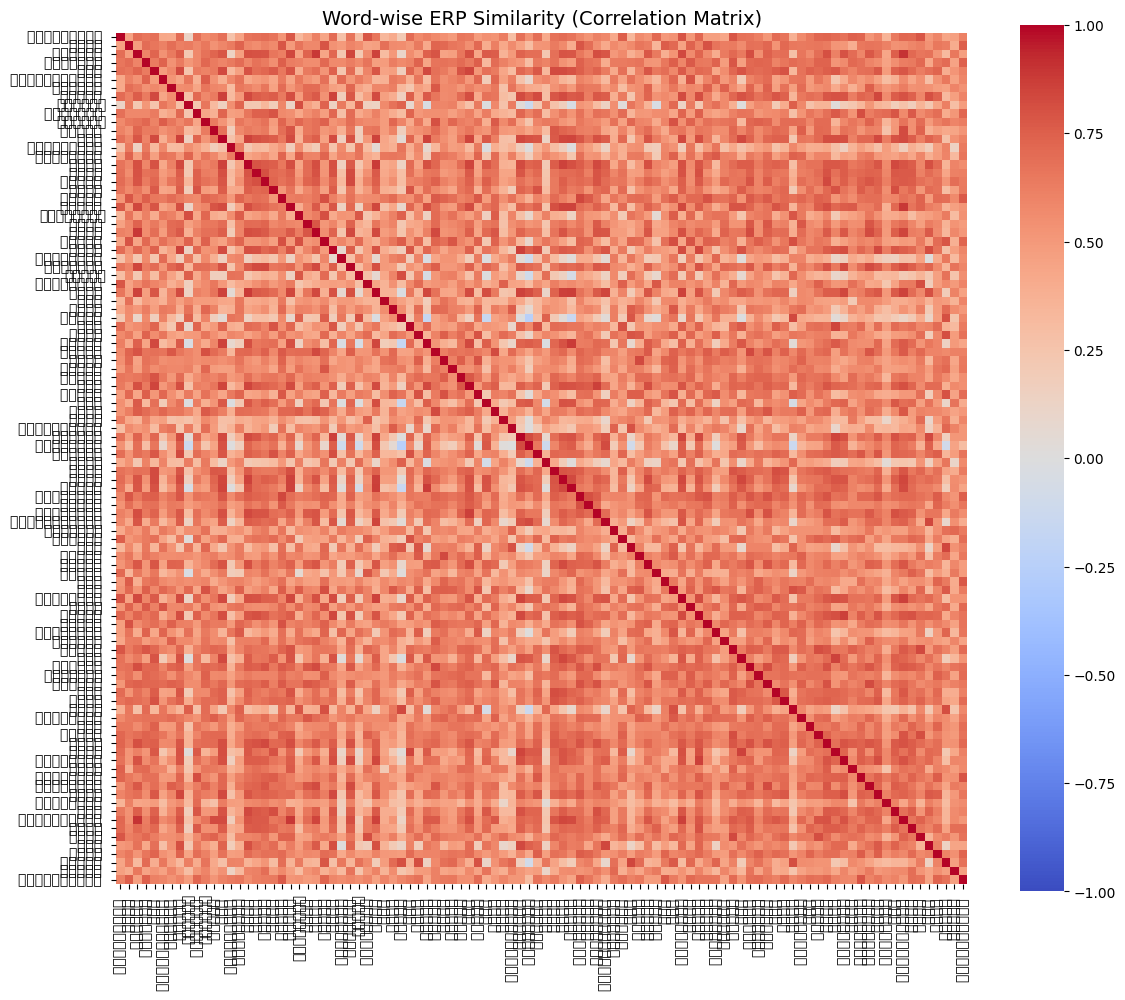

In [47]:
import mne
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# -----------------------------------------------------
# LOAD EPOCHS
# -----------------------------------------------------
epochs = mne.read_epochs("Averaged_Laxkar_Amit.fif", preload=True)
meta = epochs.metadata
data = epochs.get_data()     # (n_epochs, n_channels, n_times)
times = epochs.times

# -----------------------------------------------------
# GROUP BY WORD AND COMPUTE ERPs
# -----------------------------------------------------
words = sorted(meta["Word"].unique())

erp_dict = {}

for w in words:
    idx = np.where(meta["Word"] == w)[0]
    erp = data[idx].mean(axis=0)      # (channels, time)
    erp_dict[w] = erp.flatten()       # flatten to 1D for correlation

# -----------------------------------------------------
# BUILD CORRELATION MATRIX
# -----------------------------------------------------
erp_matrix = np.array([erp_dict[w] for w in words])  # shape: (n_words, features)

corr_matrix = np.corrcoef(erp_matrix)

# -----------------------------------------------------
# PLOT HEATMAP
# -----------------------------------------------------
plt.figure(figsize=(12, 10))
sns.heatmap(
    corr_matrix, 
    xticklabels=words, 
    yticklabels=words,
    cmap="coolwarm",
    vmin=-1,
    vmax=1,
    square=True
)

plt.title("Word-wise ERP Similarity (Correlation Matrix)", fontsize=14)
plt.tight_layout()
plt.show()


Reading c:\Users\Darkrai\Desktop\DP\Averaged_Laxkar_Amit.fif ...


C:\Users\Darkrai\AppData\Local\Temp\ipykernel_5388\1905735032.py:19: RuntimeWarning: This filename (Averaged_Laxkar_Amit.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs("Averaged_Laxkar_Amit.fif", preload=True)


Isotrak not found
    Found the data of interest:
        t =    -100.00 ...     400.00 ms
        0 CTF compensation matrices available
Adding metadata with 5 columns
3000 matching events found
No baseline correction applied
0 projection items activated

 Decoding: Frequency_Class


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 20 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:   46.3s remaining:  1.2min
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   50.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 20 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:   47.8s remaining:  1.2min
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   52.2s finished


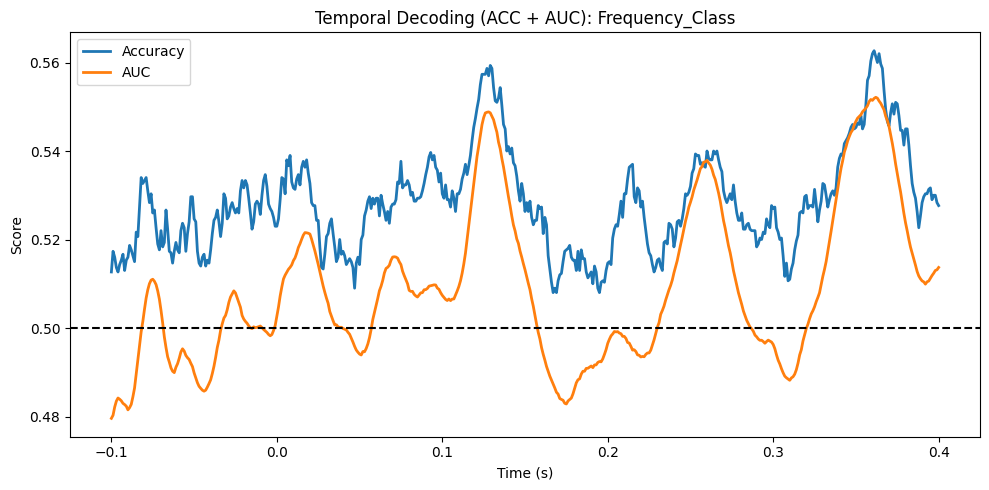

Peak AUC time = 0.362s   AUC = 0.552
Peak Accuracy at that time = 0.561


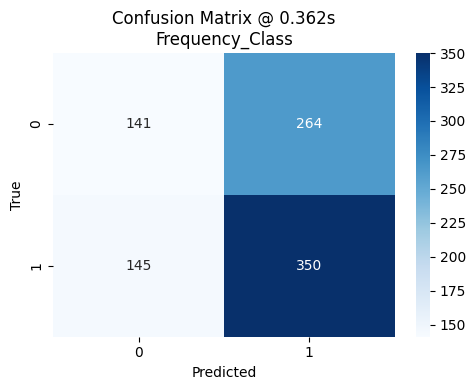


Classification Report:
              precision    recall  f1-score   support

           0       0.49      0.35      0.41       405
           1       0.57      0.71      0.63       495

    accuracy                           0.55       900
   macro avg       0.53      0.53      0.52       900
weighted avg       0.54      0.55      0.53       900


 Decoding: mn label(1,0)


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 20 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:   42.2s remaining:  1.1min
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   46.3s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 20 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:   48.4s remaining:  1.2min
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   52.3s finished


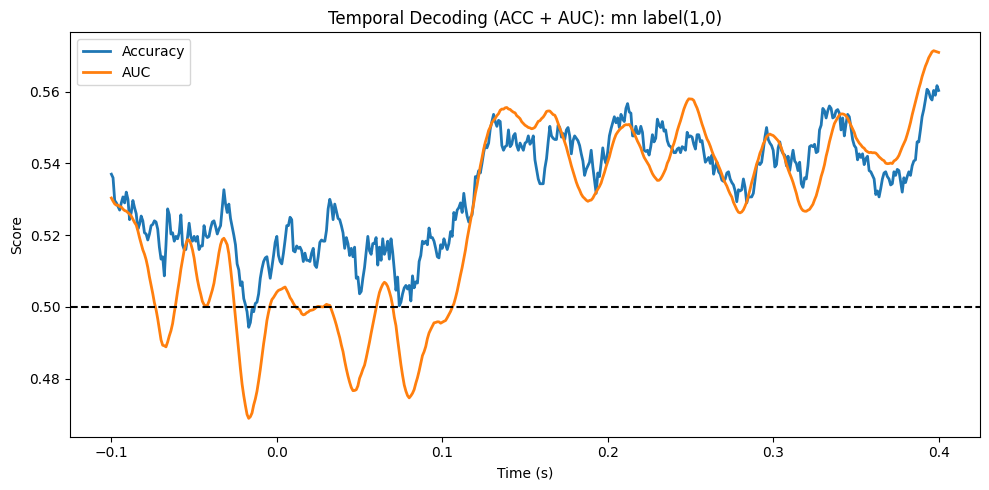

Peak AUC time = 0.397s   AUC = 0.571
Peak Accuracy at that time = 0.560


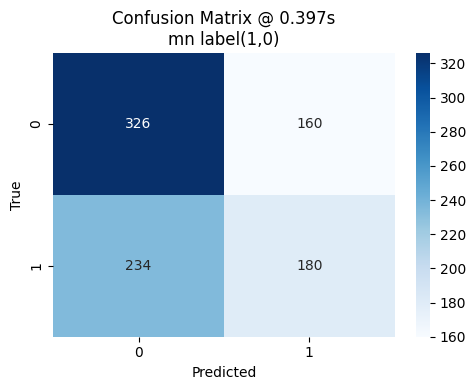


Classification Report:
              precision    recall  f1-score   support

           0       0.58      0.67      0.62       486
           1       0.53      0.43      0.48       414

    accuracy                           0.56       900
   macro avg       0.56      0.55      0.55       900
weighted avg       0.56      0.56      0.56       900


 Decoding: length_class


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 20 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:   42.0s remaining:  1.1min
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   46.7s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 20 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:   43.5s remaining:  1.1min
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   46.4s finished


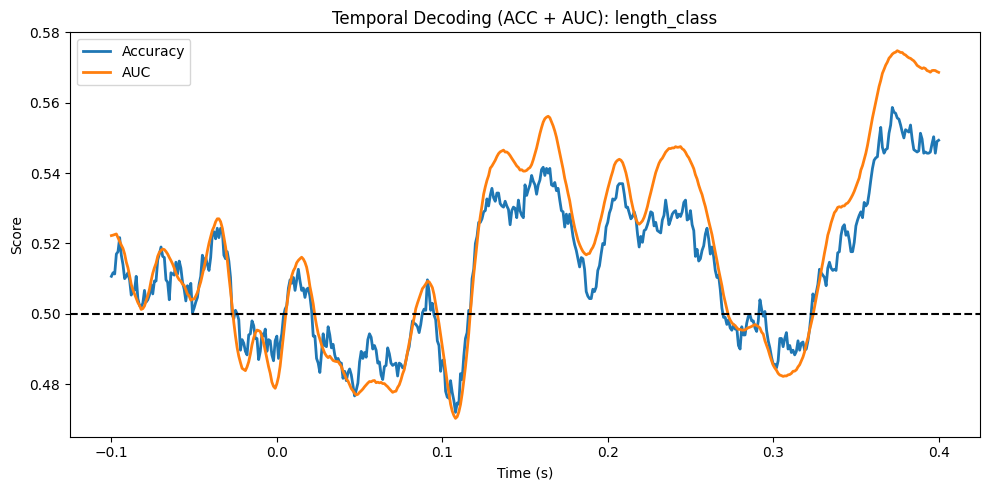

Peak AUC time = 0.375s   AUC = 0.575
Peak Accuracy at that time = 0.556


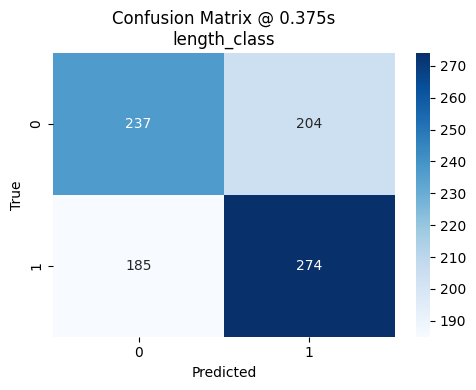


Classification Report:
              precision    recall  f1-score   support

           0       0.56      0.54      0.55       441
           1       0.57      0.60      0.58       459

    accuracy                           0.57       900
   macro avg       0.57      0.57      0.57       900
weighted avg       0.57      0.57      0.57       900



In [50]:
import mne
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import (
    classification_report,
    confusion_matrix
)
from mne.decoding import SlidingEstimator, cross_val_multiscore

# -------------------------------------------------------------
# LOAD DATA
# -------------------------------------------------------------
epochs = mne.read_epochs("Averaged_Laxkar_Amit.fif", preload=True)
meta = epochs.metadata
data = epochs.get_data()   # (n_epochs, n_channels, n_times)
times = epochs.times


# -------------------------------------------------------------
# MAIN DECODING FUNCTION (ACC + AUC)
# -------------------------------------------------------------
def temporal_decoder(column_name):

    print(f"\n==============================")
    print(f" Decoding: {column_name}")
    print(f"==============================")

    # Labels
    y = meta[column_name].astype(int).values

    # Classifier
    clf = make_pipeline(
        StandardScaler(),
        LogisticRegression(max_iter=1000)
    )

    # -----------------------------
    # ACCURACY Sliding Estimator
    # -----------------------------
    time_clf_acc = SlidingEstimator(clf, scoring="accuracy", n_jobs=-1)
    scores_acc = cross_val_multiscore(time_clf_acc, data, y, cv=5, n_jobs=-1)
    mean_acc = scores_acc.mean(axis=0)

    # -----------------------------
    # AUC Sliding Estimator
    # -----------------------------
    time_clf_auc = SlidingEstimator(clf, scoring="roc_auc", n_jobs=-1)
    scores_auc = cross_val_multiscore(time_clf_auc, data, y, cv=5, n_jobs=-1)
    mean_auc = scores_auc.mean(axis=0)

    # ---------------------------------------------------------
    # Plot ACC + AUC decoding curves
    # ---------------------------------------------------------
    plt.figure(figsize=(10,5))
    plt.plot(times, mean_acc, label="Accuracy", linewidth=2)
    plt.plot(times, mean_auc, label="AUC", linewidth=2)
    plt.axhline(0.5, color="k", linestyle="--")
    plt.xlabel("Time (s)")
    plt.ylabel("Score")
    plt.title(f"Temporal Decoding (ACC + AUC): {column_name}")
    plt.legend()
    plt.tight_layout()
    plt.show()

    # ---------------------------------------------------------
    # Peak decoding (based on AUC)
    # ---------------------------------------------------------
    peak_idx = np.argmax(mean_auc)
    peak_time = times[peak_idx]

    print(f"Peak AUC time = {peak_time:.3f}s   AUC = {mean_auc[peak_idx]:.3f}")
    print(f"Peak Accuracy at that time = {mean_acc[peak_idx]:.3f}")

    # ---------------------------------------------------------
    # PEAK TIME CLASSIFIER (train/test split)
    # ---------------------------------------------------------
    X_peak = data[:, :, peak_idx]   # shape: (n_samples, n_channels)

    X_train, X_test, y_train, y_test = train_test_split(
        X_peak, y,
        test_size=0.3,
        random_state=42,
        stratify=y
    )

    clf_peak = make_pipeline(
        StandardScaler(),
        LogisticRegression(max_iter=1000)
    )
    clf_peak.fit(X_train, y_train)

    y_pred = clf_peak.predict(X_test)

    # ---------------------------------------------------------
    # CONFUSION MATRIX (blue heatmap style)
    # ---------------------------------------------------------
    cm = confusion_matrix(y_test, y_pred)

    plt.figure(figsize=(5,4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f"Confusion Matrix @ {peak_time:.3f}s\n{column_name}")
    plt.xlabel("Predicted")
    plt.ylabel("True")
    plt.tight_layout()
    plt.show()

    # ---------------------------------------------------------
    # CLASSIFICATION REPORT
    # ---------------------------------------------------------
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))

    return mean_acc, mean_auc, peak_time


# -------------------------------------------------------------
# RUN FOR ALL THREE COLUMNS
# -------------------------------------------------------------
cols = ["Frequency_Class", "mn label(1,0)", "length_class"]

results = {}
for c in cols:
    results[c] = temporal_decoder(c)


Reading c:\Users\Darkrai\Desktop\DP\Averaged_Laxkar_Amit.fif ...
Isotrak not found


C:\Users\Darkrai\AppData\Local\Temp\ipykernel_5388\2497770836.py:19: RuntimeWarning: This filename (Averaged_Laxkar_Amit.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs("Averaged_Laxkar_Amit.fif", preload=True)


    Found the data of interest:
        t =    -100.00 ...     400.00 ms
        0 CTF compensation matrices available
Adding metadata with 5 columns
3000 matching events found
No baseline correction applied
0 projection items activated

 DECODING: Frequency_Class


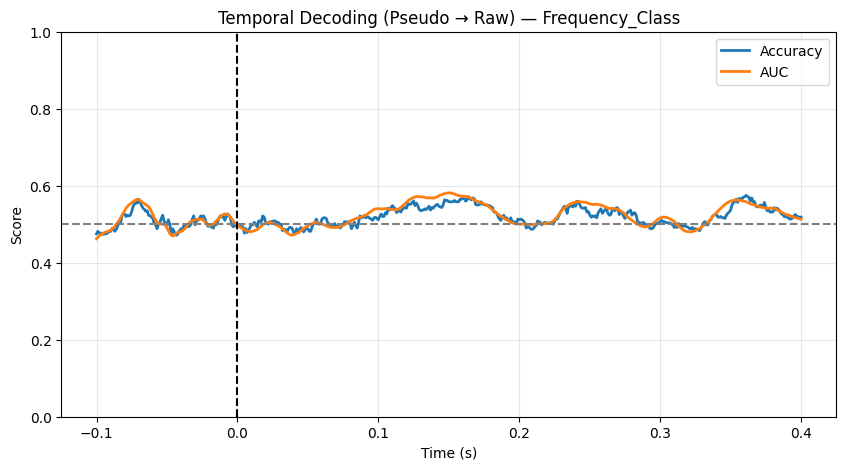

Peak AUC: 0.5816   at time 0.150s
Accuracy at peak: 0.5583


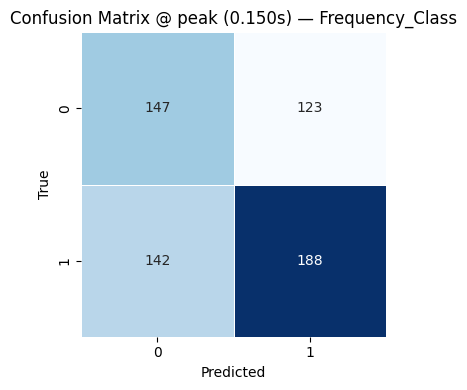


Classification report:
              precision    recall  f1-score   support

           0       0.51      0.54      0.53       270
           1       0.60      0.57      0.59       330

    accuracy                           0.56       600
   macro avg       0.56      0.56      0.56       600
weighted avg       0.56      0.56      0.56       600


 DECODING: mn label(1,0)


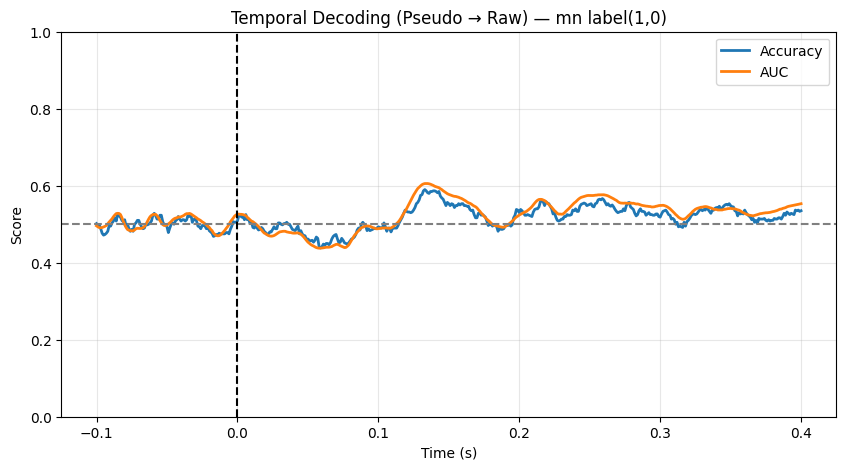

Peak AUC: 0.6057   at time 0.133s
Accuracy at peak: 0.5900


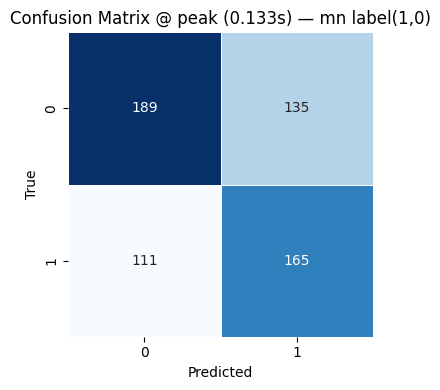


Classification report:
              precision    recall  f1-score   support

           0       0.63      0.58      0.61       324
           1       0.55      0.60      0.57       276

    accuracy                           0.59       600
   macro avg       0.59      0.59      0.59       600
weighted avg       0.59      0.59      0.59       600


 DECODING: length_class


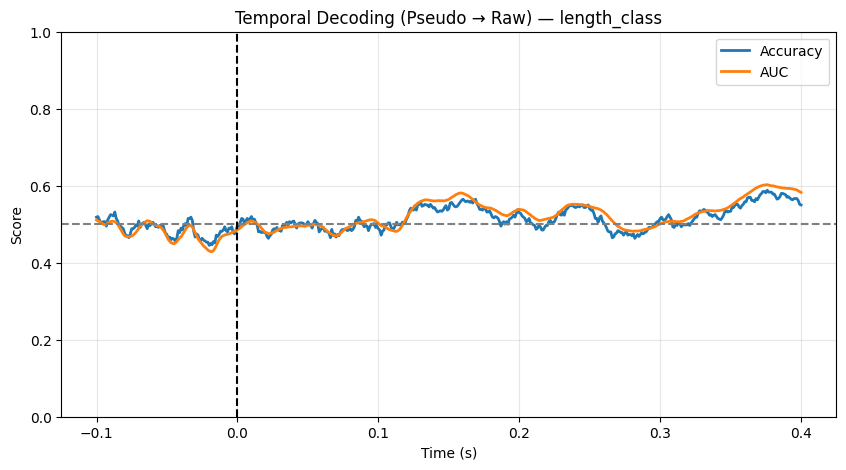

Peak AUC: 0.6027   at time 0.376s
Accuracy at peak: 0.5883


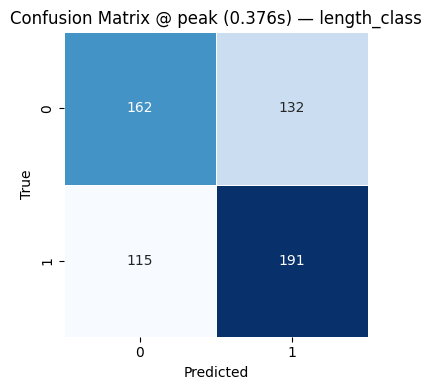


Classification report:
              precision    recall  f1-score   support

           0       0.58      0.55      0.57       294
           1       0.59      0.62      0.61       306

    accuracy                           0.59       600
   macro avg       0.59      0.59      0.59       600
weighted avg       0.59      0.59      0.59       600



In [52]:
import numpy as np
import matplotlib.pyplot as plt
import mne
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    accuracy_score,
    roc_auc_score,
    confusion_matrix,
    ConfusionMatrixDisplay,
    classification_report
)
import seaborn as sns

# -----------------------------------------------------
# LOAD
# -----------------------------------------------------
epochs = mne.read_epochs("Averaged_Laxkar_Amit.fif", preload=True)
meta = epochs.metadata
data = epochs.get_data()          # (N, ch, t)
times = epochs.times


# -----------------------------------------------------
# STRATIFIED RAW SPLIT
# -----------------------------------------------------
def stratified_split(y, frac=0.2):
    classes = np.unique(y)
    train_idx, test_idx = [], []
    for c in classes:
        idx = np.where(y == c)[0]
        np.random.shuffle(idx)
        n_test = int(len(idx) * frac)
        test_idx.extend(idx[:n_test])
        train_idx.extend(idx[n_test:])
    return np.array(train_idx), np.array(test_idx)


# -----------------------------------------------------
# PSEUDO-TRIAL CREATION
# -----------------------------------------------------
def create_pseudotrials(X, labels, label_col,
                        n_pseudo=600, avg_n=50, seed=0):
    rng = np.random.default_rng(seed)
    y = labels[label_col].values
    classes = np.unique(y)

    X_pseudo, y_pseudo = [], []

    for c in classes:
        idx = np.where(y == c)[0]
        n_per_class = n_pseudo // len(classes)

        for _ in range(n_per_class):
            chosen = rng.choice(idx, avg_n, replace=len(idx) < avg_n)
            pst = X[chosen].mean(axis=0)  # (ch, t)
            X_pseudo.append(pst)
            y_pseudo.append(c)

    X_pseudo = np.array(X_pseudo)
    y_pseudo = np.array(y_pseudo)

    perm = rng.permutation(len(y_pseudo))
    return X_pseudo[perm], y_pseudo[perm]


# -----------------------------------------------------
# CLASSIFIER
# -----------------------------------------------------
def make_clf():
    return make_pipeline(
        StandardScaler(),
        LogisticRegression(max_iter=2000, solver="liblinear")
    )


# -----------------------------------------------------
# TEMPORAL DECODER (pseudo → raw)  —  ACC + AUC
# -----------------------------------------------------
def temporal_decode_pseudo(X_pseudo, y_pseudo, X_raw, y_raw):
    n_times = X_pseudo.shape[2]
    auc_list = []
    acc_list = []

    for t in range(n_times):
        clf = make_clf()
        clf.fit(X_pseudo[:, :, t], y_pseudo)

        probs = clf.predict_proba(X_raw[:, :, t])[:, 1]
        preds = clf.predict(X_raw[:, :, t])

        auc = roc_auc_score(y_raw, probs)
        acc = accuracy_score(y_raw, preds)

        auc_list.append(auc)
        acc_list.append(acc)

    return np.array(acc_list), np.array(auc_list)


# -----------------------------------------------------
# MAIN LOOP FOR ALL 3 COLUMNS
# -----------------------------------------------------
columns = ["Frequency_Class", "mn label(1,0)", "length_class"]

for col in columns:
    print("\n===================================================")
    print(f" DECODING: {col}")
    print("===================================================")

    # raw split
    y_raw = meta[col].astype(int).values
    train_idx, test_idx = stratified_split(y_raw, frac=0.2)

    X_train_raw = data[train_idx]
    X_test_raw  = data[test_idx]

    meta_train = meta.iloc[train_idx]
    meta_test  = meta.iloc[test_idx]

    # create pseudo-trials (TRAIN ONLY)
    X_pseudo, y_pseudo = create_pseudotrials(
        X_train_raw,
        meta_train,
        col,
        n_pseudo=600,
        avg_n=50,
        seed=42
    )

    # TEMPORAL DECODING (pseudo → raw) — ACC + AUC
    acc_scores, auc_scores = temporal_decode_pseudo(
        X_pseudo, y_pseudo,
        X_test_raw, meta_test[col].astype(int).values
    )

    # plot
    plt.figure(figsize=(10,5))
    plt.plot(times, acc_scores, label="Accuracy", linewidth=2)
    plt.plot(times, auc_scores, label="AUC", linewidth=2)
    plt.axhline(0.5, color="gray", linestyle="--")
    plt.axvline(0, color="k", linestyle="--")
    plt.title(f"Temporal Decoding (Pseudo → Raw) — {col}")
    plt.xlabel("Time (s)")
    plt.ylabel("Score")
    plt.ylim([0,1])
    plt.legend()
    plt.grid(alpha=0.3)
    plt.show()

    # -------- PEAK BASED ON AUC --------
    peak_idx = np.argmax(auc_scores)
    peak_t = times[peak_idx]

    print(f"Peak AUC: {auc_scores.max():.4f}   at time {peak_t:.3f}s")
    print(f"Accuracy at peak: {acc_scores[peak_idx]:.4f}")

    # -----------------------------------------------------
    # CONFUSION MATRIX + CLASSIFICATION REPORT @ peak time
    # -----------------------------------------------------
    clf = make_clf()
    clf.fit(X_pseudo[:, :, peak_idx], y_pseudo)

    y_pred = clf.predict(X_test_raw[:, :, peak_idx])
    y_true = meta_test[col].astype(int).values

    cm = confusion_matrix(y_true, y_pred)

    plt.figure(figsize=(5,4))
    sns.heatmap(
        cm,
        annot=True,
        fmt='d',
        cmap='Blues',
        cbar=False,
        square=True,
        linewidths=0.5,
        linecolor='white'
    )
    plt.title(f"Confusion Matrix @ peak ({peak_t:.3f}s) — {col}")
    plt.xlabel("Predicted")
    plt.ylabel("True")
    plt.tight_layout()
    plt.show()


    print("\nClassification report:")
    print(classification_report(y_true, y_pred))


Reading c:\Users\Darkrai\Desktop\DP\Averaged_Laxkar_Amit.fif ...
Isotrak not found
    Found the data of interest:
        t =    -100.00 ...     400.00 ms
        0 CTF compensation matrices available


C:\Users\Darkrai\AppData\Local\Temp\ipykernel_5388\1078992802.py:18: RuntimeWarning: This filename (Averaged_Laxkar_Amit.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs("Averaged_Laxkar_Amit.fif", preload=True)


Adding metadata with 5 columns
3000 matching events found
No baseline correction applied
0 projection items activated

   PSEUDO → PSEUDO DECODING : Frequency_Class


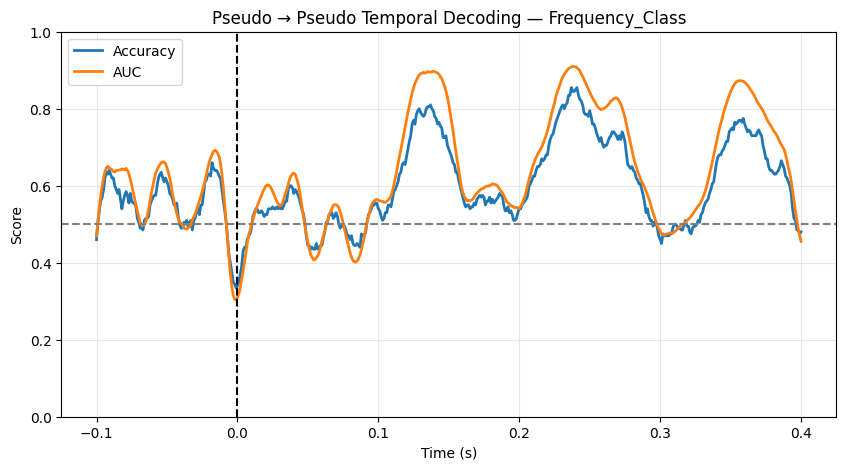

Peak AUC = 0.910  at t = 0.238 s
Accuracy at peak = 0.845


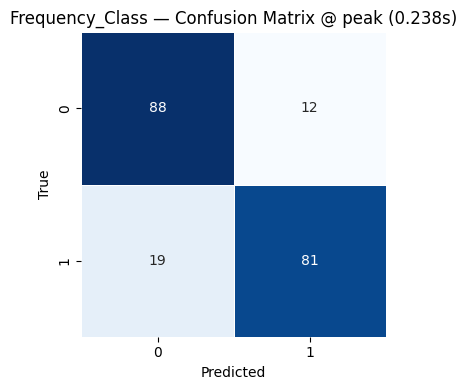


Classification Report:
              precision    recall  f1-score   support

         0.0       0.82      0.88      0.85       100
         1.0       0.87      0.81      0.84       100

    accuracy                           0.84       200
   macro avg       0.85      0.84      0.84       200
weighted avg       0.85      0.84      0.84       200


   PSEUDO → PSEUDO DECODING : mn label(1,0)


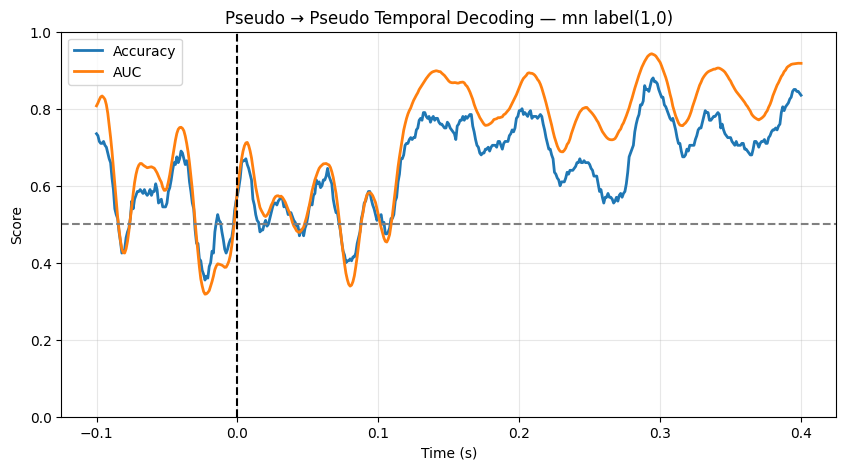

Peak AUC = 0.943  at t = 0.294 s
Accuracy at peak = 0.875


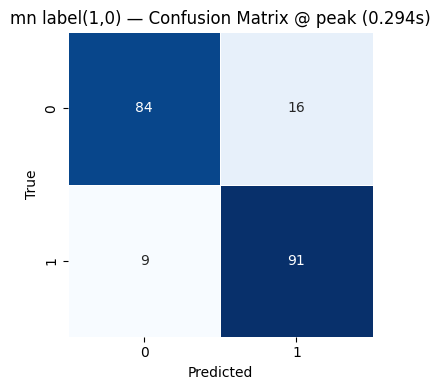


Classification Report:
              precision    recall  f1-score   support

         0.0       0.90      0.84      0.87       100
         1.0       0.85      0.91      0.88       100

    accuracy                           0.88       200
   macro avg       0.88      0.88      0.87       200
weighted avg       0.88      0.88      0.87       200


   PSEUDO → PSEUDO DECODING : length_class


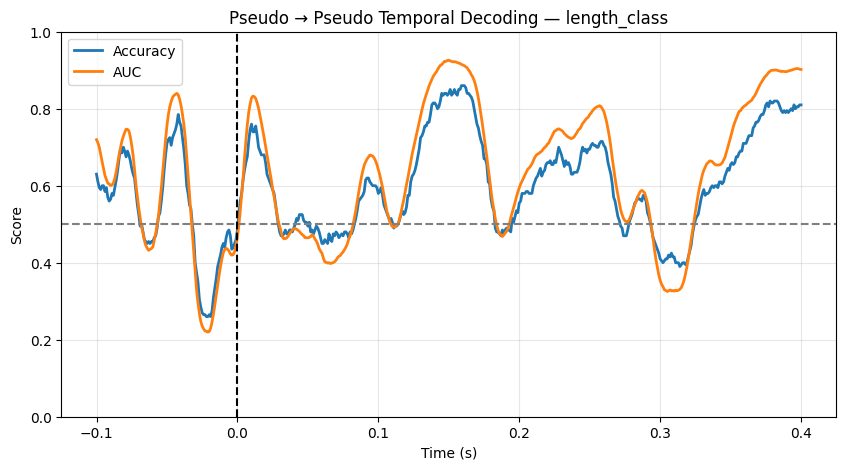

Peak AUC = 0.926  at t = 0.150 s
Accuracy at peak = 0.840


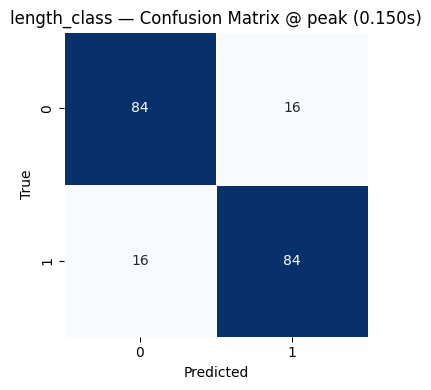


Classification Report:
              precision    recall  f1-score   support

         0.0       0.84      0.84      0.84       100
         1.0       0.84      0.84      0.84       100

    accuracy                           0.84       200
   macro avg       0.84      0.84      0.84       200
weighted avg       0.84      0.84      0.84       200



In [54]:
import numpy as np
import matplotlib.pyplot as plt
import mne
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    accuracy_score,
    roc_auc_score,
    confusion_matrix,
    classification_report
)
import seaborn as sns

# -----------------------------------------------------
# LOAD
# -----------------------------------------------------
epochs = mne.read_epochs("Averaged_Laxkar_Amit.fif", preload=True)
meta = epochs.metadata
data = epochs.get_data()
times = epochs.times


# -----------------------------------------------------
# STRATIFIED SPLIT FIRST (MOST IMPORTANT STEP)
# -----------------------------------------------------
def stratified_split(y, frac=0.2):
    classes = np.unique(y)
    train_idx, test_idx = [], []
    for c in classes:
        idx = np.where(y == c)[0]
        np.random.shuffle(idx)
        n_test = int(len(idx) * frac)
        test_idx.extend(idx[:n_test])
        train_idx.extend(idx[n_test:])
    return np.array(train_idx), np.array(test_idx)


# -----------------------------------------------------
# PSEUDO-TRIAL CREATION (within split only)
# -----------------------------------------------------
def create_pseudotrials(X, labels, label_col,
                        n_pseudo=400, avg_n=40, seed=0):
    rng = np.random.default_rng(seed)
    y = labels[label_col].values
    classes = np.unique(y)

    X_ps, y_ps = [], []

    for c in classes:
        idx = np.where(y == c)[0]
        n_per_class = n_pseudo // len(classes)

        for _ in range(n_per_class):
            chosen = rng.choice(idx, avg_n, replace=len(idx) < avg_n)
            pst = X[chosen].mean(axis=0)
            X_ps.append(pst)
            y_ps.append(c)

    X_ps = np.array(X_ps)
    y_ps = np.array(y_ps)

    perm = rng.permutation(len(y_ps))
    return X_ps[perm], y_ps[perm]


# -----------------------------------------------------
# CLASSIFIER
# -----------------------------------------------------
def make_clf():
    return make_pipeline(
        StandardScaler(),
        LogisticRegression(max_iter=2000, solver="liblinear")
    )


# -----------------------------------------------------
# TEMPORAL DECODER (pseudo → pseudo)
# -----------------------------------------------------
def temporal_decode_pseudo_to_pseudo(Xp_train, yp_train, Xp_test, yp_test):
    n_times = Xp_train.shape[2]
    acc_list, auc_list = [], []

    for t in range(n_times):
        clf = make_clf()
        clf.fit(Xp_train[:, :, t], yp_train)

        probs = clf.predict_proba(Xp_test[:, :, t])[:, 1]
        preds = clf.predict(Xp_test[:, :, t])

        acc_list.append(accuracy_score(yp_test, preds))
        auc_list.append(roc_auc_score(yp_test, probs))

    return np.array(acc_list), np.array(auc_list)


# -----------------------------------------------------
# MAIN LOOP FOR THE THREE BINARY COLUMNS
# -----------------------------------------------------
columns = ["Frequency_Class", "mn label(1,0)", "length_class"]

for col in columns:

    print("\n========================================")
    print(f"   PSEUDO → PSEUDO DECODING : {col}")
    print("========================================")

    # ---------- 1) SPLIT FIRST ----------
    y = meta[col].astype(int).values
    train_idx, test_idx = stratified_split(y, frac=0.2)

    X_train_raw = data[train_idx]
    X_test_raw  = data[test_idx]

    meta_train = meta.iloc[train_idx]
    meta_test  = meta.iloc[test_idx]

    # ---------- 2) Create pseudo trials separately ----------
    Xp_train, yp_train = create_pseudotrials(
        X_train_raw, meta_train, col, n_pseudo=3000, avg_n=40, seed=42
    )
    Xp_test, yp_test = create_pseudotrials(
        X_test_raw, meta_test, col, n_pseudo=200, avg_n=40, seed=999
    )

    # ---------- 3) Temporal decoding ----------
    acc_scores, auc_scores = temporal_decode_pseudo_to_pseudo(
        Xp_train, yp_train, Xp_test, yp_test
    )

    # ---------- 4) Plot ----------
    plt.figure(figsize=(10,5))
    plt.plot(times, acc_scores, label="Accuracy", linewidth=2)
    plt.plot(times, auc_scores, label="AUC", linewidth=2)
    plt.axhline(0.5, color="gray", linestyle="--")
    plt.axvline(0, color="k", linestyle="--")
    plt.title(f"Pseudo → Pseudo Temporal Decoding — {col}")
    plt.xlabel("Time (s)")
    plt.ylabel("Score")
    plt.ylim([0,1])
    plt.legend()
    plt.grid(alpha=0.3)
    plt.show()

    # ---------- 5) Peak time based on AUC ----------
    peak_idx = np.argmax(auc_scores)
    peak_t = times[peak_idx]

    print(f"Peak AUC = {auc_scores.max():.3f}  at t = {peak_t:.3f} s")
    print(f"Accuracy at peak = {acc_scores[peak_idx]:.3f}")

    # ---------- 6) Confusion matrix at peak ----------
    clf = make_clf()
    clf.fit(Xp_train[:, :, peak_idx], yp_train)
    y_pred = clf.predict(Xp_test[:, :, peak_idx])

    cm = confusion_matrix(yp_test, y_pred)

    plt.figure(figsize=(5,4))
    sns.heatmap(
        cm,
        annot=True,
        fmt='d',
        cmap='Blues',
        cbar=False,
        square=True,
        linewidths=0.5,
        linecolor='white'
    )
    plt.title(f"{col} — Confusion Matrix @ peak ({peak_t:.3f}s)")
    plt.xlabel("Predicted")
    plt.ylabel("True")
    plt.tight_layout()
    plt.show()

    # ---------- 7) Report ----------
    print("\nClassification Report:")
    print(classification_report(yp_test, y_pred))


Reading c:\Users\Darkrai\Desktop\DP\Averaged_Laxkar_Amit.fif ...


Isotrak not found
    Found the data of interest:
        t =    -100.00 ...     400.00 ms
        0 CTF compensation matrices available


C:\Users\Darkrai\AppData\Local\Temp\ipykernel_5388\4195437787.py:24: RuntimeWarning: This filename (Averaged_Laxkar_Amit.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(FNAME, preload=True)


Adding metadata with 5 columns
3000 matching events found
No baseline correction applied
0 projection items activated
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Using words: ['आगे', 'दायें', 'पीछे', 'बायें']
Total trials: 120

Running Pseudo train to Pseudo test.


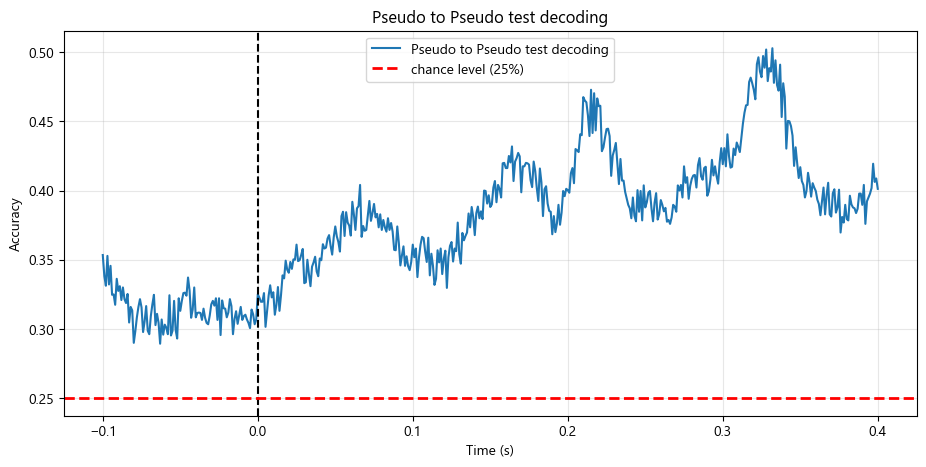


Best time = 0.332s | Accuracy=0.503


<Figure size 400x400 with 0 Axes>

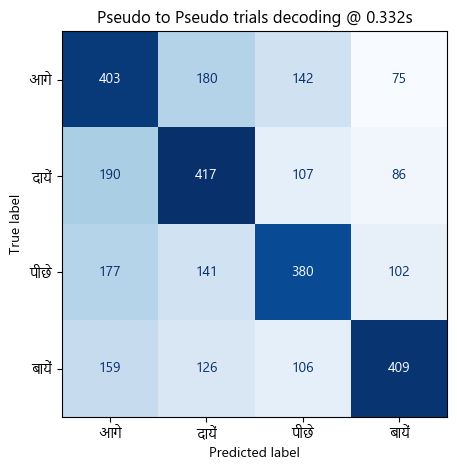


Classification report:
              precision    recall  f1-score   support

         आगे     0.4338    0.5038    0.4662       800
       दायें     0.4826    0.5212    0.5012       800
        पीछे     0.5170    0.4750    0.4951       800
       बायें     0.6086    0.5112    0.5557       800

    accuracy                         0.5028      3200
   macro avg     0.5105    0.5028    0.5045      3200
weighted avg     0.5105    0.5028    0.5045      3200



In [63]:
import numpy as np
import mne
import unicodedata
import matplotlib.pyplot as plt
from sklearn.pipeline import make_pipeline

from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay, classification_report


# ----------------------------- CONFIG -----------------------------
FNAME = "Averaged_Laxkar_Amit.fif"
TARGET_WORDS = ["आगे", "पीछे", "दायें", "बायें"]
TARGET_WORDS = [unicodedata.normalize("NFC", w).strip() for w in TARGET_WORDS]

N_SUPER = 800
K_SUPER = 50

SEED = 42
np.random.seed(SEED)

# ----------------------------- LOAD -------------------------------
epochs = mne.read_epochs(FNAME, preload=True)
epochs = epochs.pick_types(eeg=True)
epochs._data = epochs._data.astype(np.float32)

meta = epochs.metadata.copy()
X = epochs.get_data()
y = meta["Word"].astype(str).values
times = epochs.times

# --------------------------- NORMALIZE -----------------------------
def norm(x): 
    return unicodedata.normalize("NFC", str(x)).strip()

meta["Word"] = meta["Word"].apply(norm)
y = meta["Word"].values

# ------------------------ FILTER TARGET WORDS -----------------------
present = [w for w in TARGET_WORDS if w in np.unique(y)]
if len(present) < 2:
    raise RuntimeError("Directional words missing!")

mask = np.isin(y, present)
X = X[mask]
y = y[mask]
words = sorted(np.unique(y))

print("Using words:", words)
print("Total trials:", len(X))

# ---------------------- SUPERTRIAL MAKER ---------------------------
def make_super(Xpool, ypool, words, n_super, k):
    outX, outY = [], []
    rng = np.random.default_rng(0)

    for w in words:
        idx = np.where(ypool == w)[0]
        for _ in range(n_super):
            chosen = rng.choice(idx, k, replace=(len(idx)<k))
            outX.append(Xpool[chosen].mean(axis=0))
            outY.append(w)

    outX, outY = np.array(outX), np.array(outY)
    p = rng.permutation(len(outY))
    return outX[p], outY[p]

# ---------------------- CREATE SUPERTRIALS -------------------------
X_super, y_super = make_super(X, y, words, N_SUPER, K_SUPER)
noise = np.random.randn(*X_super.shape) * NOISE_STD
X_super_noisy = X_super + noise

# ---------------------- CLASSIFIER ---------------------------------
def clf():
    return make_pipeline(
        StandardScaler(),
        LogisticRegression(max_iter=5000, solver="lbfgs")
    )

# ---------------------- TEMPORAL DECODING --------------------------
def temporal_decode(Xtr, ytr, Xte, yte):
    T = Xtr.shape[2]
    acc = np.zeros(T)
    preds = {}

    for t in range(T):
        model = clf()
        model.fit(Xtr[:, :, t], ytr)
        pred = model.predict(Xte[:, :, t])
        acc[t] = accuracy_score(yte, pred)
        preds[t] = pred

    return acc, preds


print("\nRunning Pseudo train to Pseudo test.")
acc_ss, preds_ss = temporal_decode(X_super, y_super, X_super_noisy, y_super)
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

# Use a Hindi–compatible font
plt.rcParams['font.family'] = 'Nirmala UI'   # or 'Mangal'

# ----------------------------- PLOT CURVES -------------------------
plt.figure(figsize=(11,5))
plt.plot(times, acc_ss, label="Pseudo to Pseudo test decoding")
plt.axvline(0, ls='--', c='k')
plt.grid(alpha=0.3)
plt.xlabel("Time (s)")
plt.ylabel("Accuracy")
plt.axhline(y=1/4, color='r', linestyle='--', linewidth=2,label='chance level (25%)')
plt.title("Pseudo to Pseudo test decoding")
plt.legend()
plt.show()

# ------------------ CONFUSION MATRIX FOR BEST TIME ----------------
t = np.argmax(acc_ss)
print(f"\nBest time = {times[t]:.3f}s | Accuracy={acc_ss[t]:.3f}")

cm = confusion_matrix(y_super, preds_ss[t], labels=words)
disp = ConfusionMatrixDisplay(cm, display_labels=words)

plt.figure(figsize=(4,4))
disp.plot(cmap="Blues", colorbar=False)

plt.title(f"Pseudo to Pseudo trials decoding @ {times[t]:.3f}s")
plt.tight_layout()
plt.show()

print("\nClassification report:")
print(classification_report(y_super, preds_ss[t], digits=4))
